# Spec2Vec
1. Import MS-MS data from MGF file
2. Create smaller subset of data
3. Train Spec2Vec models for both datasets

In [1]:
# Locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_all\\"
PATH_SAVE_MODEL = ROOT + "\\Spec2Vec\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\Spec2Vec\\data\\"
PATH_SPEC2VEC = ROOT + "\\Spec2Vec\\code\\"

In [2]:
import numpy as np
import sys
sys.path.insert(0, PATH_SPEC2VEC)

import helper_functions as functions
import MS_functions

# Import and filter MS-MS data from MGF file (negative ionization mode)

### Loading MGF file
In the following the MGF file containing all spectra and metadata will be loaded. 
The MGF file was generated from all publich gnps libraries (state: 26 July 2019). Spectra annotations were checked, cleaned, and extended where possible following a procedure described in another notebook: https://github.com/iomega/Spec2Vec/blob/master/notebooks/Spec2Vec_01_MGF_from_gnps_library_search.ipynb  

### Spectra filtering
**1. Discard spectra with too few peaks.**  
Spectra with less than "min_peaks" peaks will be ignored. Here this is set to min_peaks = 10.  

**2. Filter out noise.**  
Further filtering is done to reduce the level of noise in the spectra. For this we calculate a threshold (or minimum peak intensity) for every spectrum. Where possible (most cases), this threshold is calculated by doing an exponential fit to the peak intensity histogram ("exp_intensity_filter"). If that fails we take the mean intensity of all peaks but the highest as a threshold.  

**3. But keep enough information.**  
Aimed at similar sized documents: If the number of peaks above the set threshold is lower than $n_{aim}$ = min_peaks + peaks_per_mz * precursor_mass we will at least keep the highest $n_{aim}$ peaks.

### Creation of documents from spectra
Peaks and losses (= precursor mass - peak mass) are converted into words using a precision of "num_decimals".  
A peak with m/z = 108.3643 will hence become a string: "peak_108.36".  
A loss with m/z = 64.2257 will hence become a string: "loss_64.23".  
All words of one spectrum are collected in one list which represents the entire spectrum as a 'document'.

In [3]:
# Import & filter data from all-GNPS dataset
file_json = PATH_MS_DATA + "allGNPS_positive_minpeak10_loss500_2dec_exp001_191106.json"
file_mgf = ROOT + "\\Data\\GNPS_all\\" + "allGNPS_positive_191106.mgf"

spectra, spectra_dict, MS_documents, MS_documents_intensity, sub_spectra_metadata = MS_functions.load_MGF_data(file_mgf = file_mgf,
                                                           file_json = file_json,
                                                           num_decimals = 2,
                                                           min_frag = 0.0, max_frag = 1000.0,
                                                           min_loss = 5.0, max_loss = 500.0,
                                                           min_intensity_perc = 0,
                                                           exp_intensity_filter = 0.01,
                                                           peaks_per_mz = 20/200,
                                                           min_peaks = 10,
                                                           max_peaks = None,
                                                           peak_loss_words = ['peak_', 'loss_'])

Could not find file  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\Data\GNPS_all\allGNPS_positive_minpeak10_loss500_2dec_exp001_191106.json
Data will be imported from  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\Data\GNPS_all\allGNPS_positive_191106.mgf


C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\Spec2Vec\code\MS_functions.py:412: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)
C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:780: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


RuntimeError for  123  peaks. Use mean intensity as threshold.
RuntimeError for  92  peaks. Use mean intensity as threshold.
RuntimeError for  206  peaks. Use mean intensity as threshold.
RuntimeError for  181  peaks. Use mean intensity as threshold.
RuntimeError for  114  peaks. Use mean intensity as threshold.
RuntimeError for  77  peaks. Use mean intensity as threshold.
RuntimeError for  91  peaks. Use mean intensity as threshold.
RuntimeError for  96  peaks. Use mean intensity as threshold.
RuntimeError for  87  peaks. Use mean intensity as threshold.
RuntimeError for  227  peaks. Use mean intensity as threshold.
RuntimeError for  200  peaks. Use mean intensity as threshold.
RuntimeError for  193  peaks. Use mean intensity as threshold.
RuntimeError for  192  peaks. Use mean intensity as threshold.
RuntimeError for  205  peaks. Use mean intensity as threshold.
RuntimeError for  278  peaks. Use mean intensity as threshold.
RuntimeError for  219  peaks. Use mean intensity as threshol

  Created documents for  11300  of  90290  spectra.No losses detected for:  11371 11723
No losses detected for:  11372 11724
  Created documents for  11500  of  90290  spectra.No losses detected for:  11539 11891
  Created documents for  11700  of  90290  spectra.No losses detected for:  11786 12138
No losses detected for:  11787 12139
  Created documents for  12300  of  90290  spectra.No losses detected for:  12303 12656
  Created documents for  12400  of  90290  spectra.No losses detected for:  12460 12813
  Created documents for  12500  of  90290  spectra.No losses detected for:  12560 12913
  Created documents for  12700  of  90290  spectra.No losses detected for:  12767 13120
No losses detected for:  12784 13137
  Created documents for  12800  of  90290  spectra.No losses detected for:  12805 13158
No losses detected for:  12806 13159
  Created documents for  12900  of  90290  spectra.No losses detected for:  12924 13277
No losses detected for:  12968 13321
No losses detected for:

  Created documents for  34000  of  90290  spectra.No losses detected for:  34028 41725
  Created documents for  34100  of  90290  spectra.No losses detected for:  34113 41821
No losses detected for:  34126 41834
  Created documents for  34300  of  90290  spectra.No losses detected for:  34366 42101
  Created documents for  34400  of  90290  spectra.No losses detected for:  34400 42146
No losses detected for:  34458 42217
No losses detected for:  34486 42253
  Created documents for  34500  of  90290  spectra.No losses detected for:  34507 42282
No losses detected for:  34527 42306
No losses detected for:  34531 42311
  Created documents for  34600  of  90290  spectra.No losses detected for:  34630 42428
No losses detected for:  34642 42442
  Created documents for  34700  of  90290  spectra.No losses detected for:  34706 42517
No losses detected for:  34739 42554
No losses detected for:  34749 42566
No losses detected for:  34762 42585
No losses detected for:  34766 42589
No losses dete

No losses detected for:  47492 58349
No losses detected for:  47495 58352
No losses detected for:  47497 58354
  Created documents for  47500  of  90290  spectra.No losses detected for:  47504 58361
No losses detected for:  47505 58362
No losses detected for:  47506 58363
No losses detected for:  47511 58368
No losses detected for:  47512 58369
No losses detected for:  47528 58385
No losses detected for:  47529 58386
No losses detected for:  47530 58387
No losses detected for:  47531 58388
No losses detected for:  47532 58389
No losses detected for:  47533 58390
No losses detected for:  47534 58391
No losses detected for:  47535 58392
No losses detected for:  47536 58393
No losses detected for:  47537 58394
No losses detected for:  47538 58395
No losses detected for:  47539 58396
No losses detected for:  47542 58399
No losses detected for:  47556 58413
No losses detected for:  47560 58417
No losses detected for:  47561 58418
No losses detected for:  47562 58419
No losses detected for: 

  Created documents for  50800  of  90290  spectra.No losses detected for:  50818 61675
No losses detected for:  50821 61678
No losses detected for:  50827 61684
No losses detected for:  50828 61685
No losses detected for:  50829 61686
No losses detected for:  50830 61687
  Created documents for  50900  of  90290  spectra.No losses detected for:  50920 61777
No losses detected for:  50923 61780
No losses detected for:  50926 61783
No losses detected for:  50929 61786
  Created documents for  51000  of  90290  spectra.No losses detected for:  51088 61945
No losses detected for:  51093 61950
No losses detected for:  51094 61951
  Created documents for  51100  of  90290  spectra.No losses detected for:  51115 61972
No losses detected for:  51116 61973
No losses detected for:  51117 61974
No losses detected for:  51118 61975
No losses detected for:  51119 61976
No losses detected for:  51120 61977
  Created documents for  51300  of  90290  spectra.No losses detected for:  51307 62164
No lo

  Created documents for  58300  of  90290  spectra.No losses detected for:  58326 69183
No losses detected for:  58327 69184
No losses detected for:  58328 69185
No losses detected for:  58329 69186
No losses detected for:  58330 69187
No losses detected for:  58331 69188
No losses detected for:  58332 69189
No losses detected for:  58333 69190
No losses detected for:  58334 69191
No losses detected for:  58347 69204
No losses detected for:  58348 69205
No losses detected for:  58349 69206
No losses detected for:  58351 69208
No losses detected for:  58352 69209
No losses detected for:  58354 69211
No losses detected for:  58355 69212
No losses detected for:  58356 69213
No losses detected for:  58357 69214
No losses detected for:  58358 69215
  Created documents for  58400  of  90290  spectra.No losses detected for:  58468 69325
No losses detected for:  58469 69326
No losses detected for:  58472 69329
No losses detected for:  58474 69331
No losses detected for:  58475 69332
No losses 

In [4]:
print("Number of imported spectra:", len(spectra))

Number of imported spectra: 90290


In [5]:
spectra[10].inchi

'"InChI=1S/C26H43NO6/c1-14(4-7-22(31)27-13-23(32)33)17-5-6-18-24-19(12-21(30)26(17,18)3)25(2)9-8-16(28)10-15(25)11-20(24)29/h14-21,24,28-30H,4-13H2,1-3H3,(H,27,31)(H,32,33)/t14?,15-,16+,17+,18-,19-,20+,21-,24-,25?,26?/m0/s1"'

In [6]:
spectra[10].metadata['spectrumid']

'CCMSLIB00005435513'

In [7]:
spectra[0].inchi, spectra[20000].inchi

('"InChI=1S/C24H40O4/c1-14(4-7-21(27)28)17-5-6-18-22-19(9-11-24(17,18)3)23(2)10-8-16(25)12-15(23)13-20(22)26/h14-20,22,25-26H,4-13H2,1-3H3,(H,27,28)/t14?,15-,16+,17+,18-,19-,20+,22-,23?,24?/m0/s1"',
 'N/A')

### Check the amount of annotations we have in the dataset

In [8]:
inchi_lst = []
inchikey_lst = []
smiles_lst = []
spectrumid_lst = []

for spec in spectra:
    if 'inchi' in spec.metadata:
        inchi_lst.append(spec.metadata['inchi'])
    else:
        inchi_lst.append('0')
    if 'inchikey' in spec.metadata:
        inchikey_lst.append(spec.metadata['inchikey'])
    else:
        inchikey_lst.append('0')
    if 'smiles' in spec.metadata:
        smiles_lst.append(spec.metadata['smiles'])
    else:
        smiles_lst.append('0')
    if 'spectrumid' in spec.metadata:
        spectrumid_lst.append(spec.metadata['spectrumid'])
    else:
        spectrumid_lst.append('0')

In [9]:
empty_entry_types = empty_entry_types = ['N/A', 'n/a', 'NA', 0, '0', '""', '', 
                     'nodata', '"InChI=n/a"', '"InChI="', 
                     'InChI=1S/N\n', '\t\r\n']  # list of types that can occur which all reflect empty entries
num_inchi = len([x for x in inchi_lst if x not in empty_entry_types])
print("Number of spectra with inchi:", num_inchi)

num_inchikey = len([x for x in inchikey_lst if x not in empty_entry_types])
print("Number of spectra with inchikey:", num_inchikey)

num_smiles = len([x for x in smiles_lst if x not in empty_entry_types])
print("Number of spectra with smiles:", num_smiles)

Number of spectra with inchi: 50246
Number of spectra with inchikey: 50244
Number of spectra with smiles: 50242


## Explore some examples

In [10]:
from matplotlib import pyplot as plt

def compare_spectra(spec1, spec2, min_mz = None, max_mz = None):
    """ Plot different spectra together to compare.
    """
    plt.figure(figsize=(10,10))

    peak_number = []
    new_min_mz = 9999
    new_max_mz = 0
    colors = ['crimson', 'teal']
    for i, spec in enumerate([spec1, spec2]):
        peaks = np.array(spec.peaks.copy())
        peak_number.append(len(peaks))
        peaks[:,1] = peaks[:,1]/np.max(peaks[:,1]); 

        if new_min_mz > np.min(peaks[:,0]):
            new_min_mz = np.min(peaks[:,0])
        if new_max_mz < np.max(peaks[:,0]):
            new_max_mz = np.max(peaks[:,0])

        markerline, stemlines, baseline = plt.stem(peaks[:,0], (-1)**(i+1)*peaks[:,1], linefmt='-', markerfmt='.', basefmt='r-')
        plt.setp(stemlines, 'color', colors[i])
    
    if min_mz == None: #then update
        min_mz = max(0, (new_min_mz - 5))
    if max_mz == None: #then update
        max_mz = new_max_mz + 10
        
    plt.xlim((min_mz, max_mz))
    plt.grid(True)
    plt.title('Spectrum')
    plt.xlabel('m/z')
    plt.ylabel('peak intensity')
    
    plt.show()
    
    print("Number of peaks: ", peak_number)

100 101
pepmasses:  1065.66 538.336
charges:  1 1
Smiles 1: CC(CCC(=NC(CCC(=O)O)C(=O)O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CCC12C)C1(C)CC[C@H](C[C@H]1C[C@H]3O)O
Smiles 2: CC(CCC(=NC(CCC(=O)O)C(=O)O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CCC12C)C1(C)CC[C@H](C[C@H]1C[C@H]3O)O
Inchi 1: "InChI=1S/C29H47NO7/c1-16(4-8-24(33)30-22(27(36)37)7-9-25(34)35)19-5-6-20-26-21(11-13-29(19,20)3)28(2)12-10-18(31)14-17(28)15-23(26)32/h16-23,26,31-32H,4-15H2,1-3H3,(H,30,33)(H,34,35)(H,36,37)/t16?,17-,18+,19+,20-,21-,22?,23+,26-,28?,29?/m0/s1"
Inchi 2: "InChI=1S/C29H47NO7/c1-16(4-8-24(33)30-22(27(36)37)7-9-25(34)35)19-5-6-20-26-21(11-13-29(19,20)3)28(2)12-10-18(31)14-17(28)15-23(26)32/h16-23,26,31-32H,4-15H2,1-3H3,(H,30,33)(H,34,35)(H,36,37)/t16?,17-,18+,19+,20-,21-,22?,23+,26-,28?,29?/m0/s1"


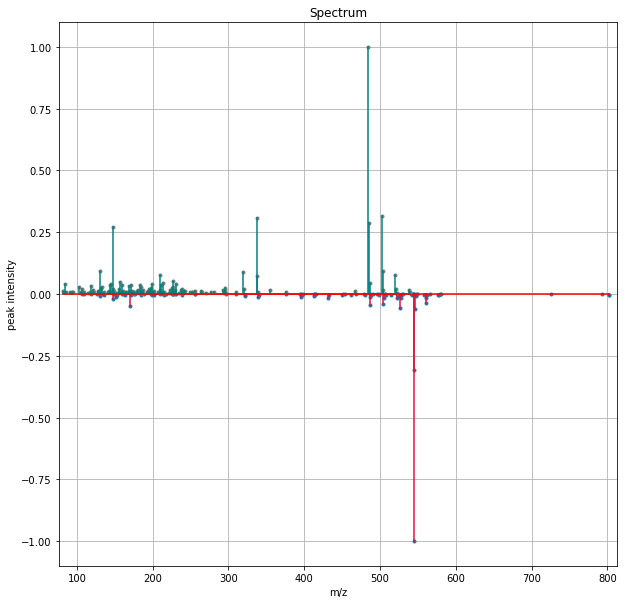

Number of peaks:  [116, 129]


In [27]:
ID1, ID2 = 100,101
print(ID1,ID2)
print("pepmasses: ", spectra[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("charges: ", spectra[ID1].metadata['charge'], spectra[ID2].metadata['charge'])
print("Smiles 1:", spectra[ID1].metadata['smiles'])
print("Smiles 2:", spectra[ID2].metadata['smiles'])
if 'inchi' in spectra[ID1].metadata:
    print("Inchi 1:", spectra[ID1].metadata['inchi'])
if 'inchi' in spectra[ID2].metadata:
    print("Inchi 2:", spectra[ID2].metadata['inchi'])
    
compare_spectra(spectra[ID1],spectra[ID2], min_mz = None, max_mz = None)

# Selecting data subset

## Number of unique inchikey

In [12]:
empty_entry_types = ['N/A', 'n/a', 'NA', 0, '0', '""', '', 
                     'nodata', '"InChI=n/a"', '"InChI="', 
                     'InChI=1S/N\n', '\t\r\n']  # list of types that can occur which all reflect empty entries

inchikey_lst_nonempty = [x for x in inchikey_lst if x not in empty_entry_types]
print("Unique inchikeys:", len(set(inchikey_lst_nonempty)))

Unique inchikeys: 12179


In [13]:
inchikey_lst_nonempty_first14 = [x[:14] for x in inchikey_lst if x not in empty_entry_types]
print("Unique inchikeys (first 14 characters):", len(set(inchikey_lst_nonempty_first14)))

Unique inchikeys (first 14 characters): 11017


# Make selection for data subset

As a subset we will select one spectra for every unique inchikey. We only consider the first 14 letters (which are a hash from the connectivity information of the respective InChI).  
Instead of choosing the first of each unique type, we could also pick the one with the most peaks or anything else...  
**Here we pick the spectra with the best library quality. And of those the one with the most peaks above a relative threshold (here = 0.1 of max intensity).**

In [14]:
[x.metadata['libraryquality'] for x in spectra[:10]]

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [15]:
qualities = np.array([int(x.metadata['libraryquality']) for x in spectra])
np.min(qualities), np.max(qualities)

(1, 3)

### Add small function to check number of peaks above relative intensity threshold

In [16]:
def count_higher_peaks(spectrum, threshold = 0.1):
    return np.sum(np.array(spectrum.peaks)[:,1]/np.array(spectrum.peaks)[:,1].max() >= threshold)

In [17]:
count_higher_peaks(spectra[25], 0.1)

1

### Pick IDs of spectra to form the 'uniqueInchikeys' subset

In [18]:
intensity_thres = 0.1

ID_picks = []
arr_inchikey14 = np.array([x[:14] for x in inchikey_lst])

# Loop through all unique inchiques (considering 14 first characters)
for inchikey14_unique in list(set(inchikey_lst_nonempty_first14)):
    select = np.where(arr_inchikey14 == inchikey14_unique)[0]
    
    # Step 1 - select best spectrum qualities (according to gnps measure). 1 > 2 > 3
    qualities = np.array([int(spectra[x].metadata['libraryquality']) for x in select])
    select_best_quality = np.where(qualities == min(qualities))[0]
    
    # Step 2 - select the ones with most peaks > threshold
    num_peaks = np.array([count_higher_peaks(spectra[x], intensity_thres) for x in select_best_quality])
    pick = np.argmax(num_peaks)
    ID_picks.append(select[pick])

In [19]:
len(ID_picks)

11017

In [20]:
spectrumID_picks = []

for id in ID_picks:
    spectrumID_picks.append(spectra[id].metadata['spectrumid'])

In [21]:
spectrumID_picks[:10]

['CCMSLIB00004708612',
 'CCMSLIB00004681457',
 'CCMSLIB00000846768',
 'CCMSLIB00000080014',
 'CCMSLIB00000846875',
 'CCMSLIB00000566663',
 'CCMSLIB00004696992',
 'CCMSLIB00000424977',
 'CCMSLIB00000079809',
 'CCMSLIB00004712785']

In [22]:
ID_picks[:10]

[48915, 5087, 8524, 7059, 8573, 32532, 40257, 3616, 6855, 52254]

In [23]:
# Save spectrum IDs to form the subset
np.save('spectrumID_uniqueInchikey14_positive.npy', np.array(spectrumID_picks))

### Collect spectra selected for subset

In [28]:
input_file = ROOT + "\\Data\\GNPS_all\\" + "allGNPS_positive_191106.mgf"

def pick_spectra_subset(input_mgf, picks):
    """ Collect spectra in file (line by line). And then create subset MGF.
    """
    subset_spectra = []
    with open(input_mgf) as f:
        for line in f.readlines():
            if line.startswith('BEGIN ION'):
                # Fresh spectrum
                spectrum = []
                spectrum_id = 0 #reset
            if line.startswith('SPECTRUMID'):
                spectrum_id = line.strip().split('=')[1]
            spectrum.append(line)
            
            if line.startswith('END ION'):
                if spectrum_id in picks:
                    picks.remove(spectrum_id) #shorten query list to speed up search
                    subset_spectra.append(spectrum)
    return subset_spectra

subset_spectra = pick_spectra_subset(input_file, spectrumID_picks)

### check if list of spectra looks OK

In [29]:
subset_spectra[0]

['BEGIN IONS\n',
 'PEPMASS=431.277\n',
 'CHARGE=1+\n',
 'MSLEVEL=2\n',
 'SOURCE_INSTRUMENT=ESI-Orbitrap\n',
 'FILENAME=Standards_p_1ugmL_cholic.mzXML\n',
 'SEQ=*..*\n',
 'IONMODE=positive\n',
 'ORGANISM=BILELIB19\n',
 'NAME=cholic acid M+Na\n',
 'PI=Dorrestein\n',
 'DATACOLLECTOR=A. Jarmusch\n',
 'SMILES=C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1([C@H](C[C@H]3[C@H]2[C@@H](C[C@H]4[C@@]3(CC[C@H](C4)O)C)O)O)C\n',
 'INCHI="InChI=1S/C24H40O5/c1-13(4-7-21(28)29)16-5-6-17-22-18(12-20(27)24(16,17)3)23(2)9-8-15(25)10-14(23)11-19(22)26/h13-20,22,25-27H,4-12H2,1-3H3,(H,28,29)/t13?,14-,15+,16+,17-,18-,19+,20-,22-,23?,24?/m0/s1"\n',
 'INCHIKEY=BHQCQFFYRZLCQQ-IHELEQLESA-N\n',
 'PUBMED=N/A\n',
 'SUBMITUSER=mpanitchpakdi\n',
 'TAGS=\n',
 'LIBRARYQUALITY=1\n',
 'SPECTRUMID=CCMSLIB00005435506\n',
 'SCANS=1468\n',
 '51.387043\t1894.130249\n',
 '59.151863\t2224.843262\n',
 '60.0509\t1949.728271\n',
 '63.075016\t1864.447266\n',
 '70.296738\t1846.509399\n',
 '90.67675\t2095.799805\n',
 '91.634308\t2209.017578\n'

### Write spectra subset to MGF file

In [30]:
output_file_subset = ROOT + "\\Data\\GNPS_all\\" + "allGNPS_positive_uniqueInchikey_191106.mgf.mgf"

with open(output_file_subset, 'w') as f:
    for c in subset_spectra[:]:
        for l in c:
            try:
                f.write(l.encode('utf8', 'replace').decode('utf8', 'replace'))
            except UnicodeEncodeError:
                f.write(l.encode('ascii', 'replace').decode('utf8', 'replace'))
                print(l)
        #f.write('\n')